# Проверка гипотез по увеличению выручки в интернет-магазине (A/B-тест)


**Цель исследования** - по запросу крупного интернет-магазина необходимо провести проверку гипотез для увеличения выручки.

В нашем распоряжении имеются данные о сформулированных гипотезах, совершенных заказах и распределении по группам, полученные от отдела маркетинга.

Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

**Описание данных**

**Данные для первой части**

Файл hypothesis.csv

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Подготовительная часть

In [1]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# создадим переменные и загрузим данные
hypothesis = pd.read_csv('')
orders = pd.read_csv('')
visitors = pd.read_csv('')

In [3]:
# создадим функцию для вывода общей информации: это позволит избавиться от повторов и сократить код 
def background(data):
    display(data.columns, data.head(), data.describe())
    print('*' * 50)
    data.info()

pd.options.display.max_colwidth = 130 # увеличиваем максимальную ширину столбцов, чтобы все поместилось

background(hypothesis)

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
background(orders)

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
background(visitors)

Index(['date', 'group', 'visitors'], dtype='object')

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
# проведем небольшую предобработку данных
for data in [hypothesis, orders, visitors]: #приводим названия столбцов к одному регистру
    data.columns = data.columns.str.lower()

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) # приводим даты к формату дата/время
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [7]:
# проверим, нет ли задвоившихся пользователей, т.е. пользователей, попавших сразу в обе группы теста
# группируем данные по пользователям и считаем кол-во групп
duplicaed_users = orders.groupby('visitorid').agg({'group':['nunique', 'unique']})
duplicaed_users.columns = ['groups', 'group_name']
duplicaed_users = duplicaed_users.query('groups > 1') # выводим тех, у кого кол-во групп превышает 1
duplicaed_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 8300375 to 4266935830
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   groups      58 non-null     int64 
 1   group_name  58 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


При проверке на уникальность пользователей в группах обнаружили, что 58 пользователей попали в обе группы теста. В реальной жизни при получении подобных результатов А/В теста, встал бы вопрос о достоверности полученных данных (одно из условий А/В теста гласит, что пользователь, попавший в 1 группу, остается в ней до конца проведения теста). Однако в рамках проекта оставим данных пользователей и не будем удать из датасета, чтобы не исказить статистические данные.

## Приоритизация гипотез

Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса (увеличение выручки), приоритизируем сформулированные гипотезы. Для приоритизации используем 2 фреймворка и сравним полученные результаты. 

### Фреймворк ICE

In [8]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы: 8, 0, 7, 6, 2.

### Фреймворк RICE

In [9]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы: 7, 2, 0, 6, 8.

In [10]:
hypothesis # сравним параметры по гипотезам

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


В зависимости от выбора ICE или RICE, к числу наиболее приоритетных гипотез относятся все те же гипотезы. Однако при применении RICE вместо ICE на 1-ое место выходит гипотеза 7, а наш лидер по ICE становится последним в 5-ке. Это связано, прежде всего, с параметром reach: у 7 гипотезы параметр выше всех, а у 8 гипотезы он ниже всех.

## Анализ A/B-теста


Мы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.
Проанализируем A/B-тест.

###  График кумулятивной выручки по группам

Чтобы построить графики, нужно собрать кумулятивные данные.

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionid' : 'nunique', 
                                           'visitorid' : 'nunique', 
                                           'revenue' : 'sum'}), axis=1)\
                                    .sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups\
            .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                   .agg({'date' : 'max', 
                         'group' : 'max', 
                         'visitors' : 'sum'}), axis=1)\
            .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


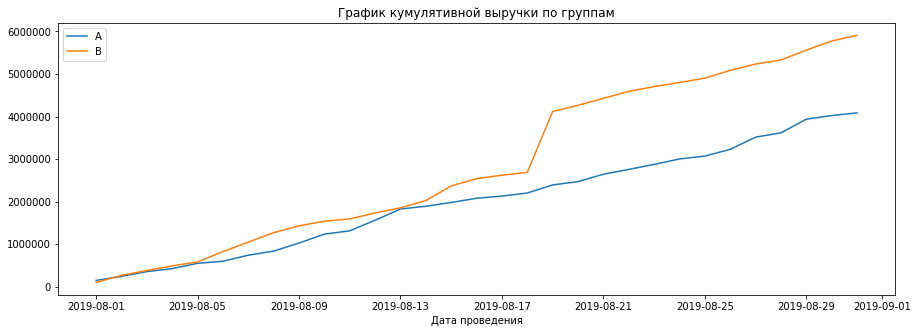

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 5))
plt.ticklabel_format(axis = 'y', style = 'plain')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата проведения')
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста.

Однако график выручки группы В в нескольких точках резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке - выбросах. 

###  График кумулятивного среднего чека по группам

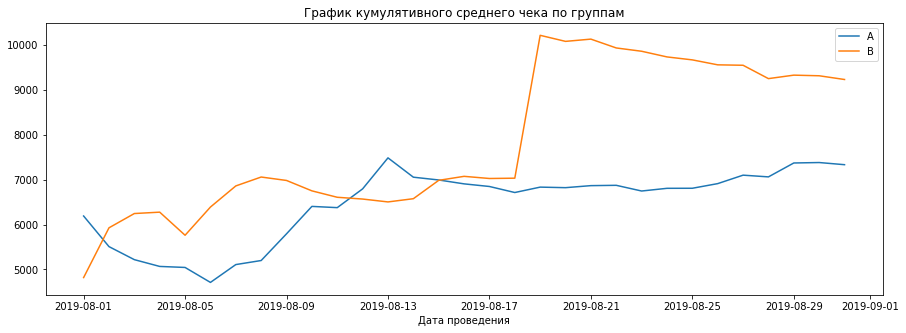

In [13]:
plt.figure(figsize=(15, 5))

# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата проведения')
plt.legend();

Средний чек тоже стремится стать равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

###  График относительного изменения кумулятивного среднего чека группы B к группе A

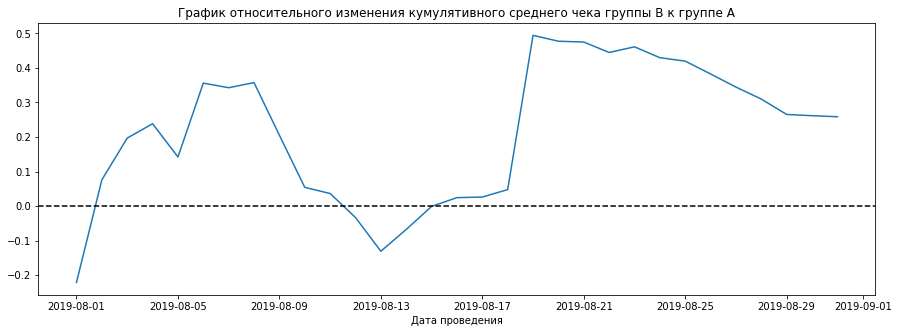

In [14]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA\
                                .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата проведения');

На графике относительного изменения кумулятивного среднего чека группы B к группе A заметны резкие скачки. Это еще один сигнал о наличии крупных заказов (выбросов) в группах.

###  График кумулятивной конверсии по группам

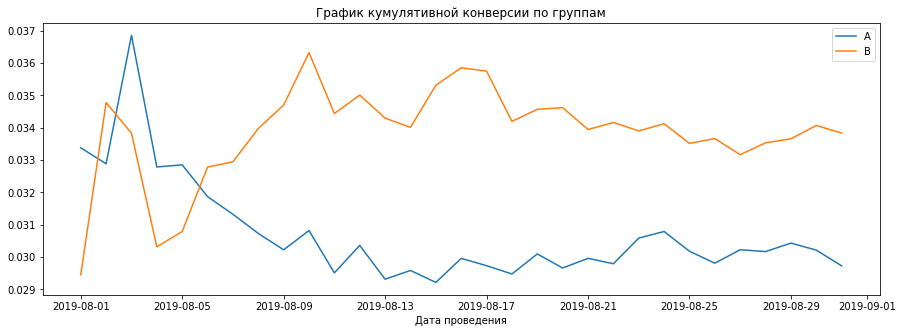

In [15]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата проведения')
plt.legend();

Конверсии обеих групп не смогли прийти к схожему уровню или установиться на определенной отметке. Почти с самого начала теста группа В вырвалась вперед, а группа А просела. Проверим конверсию  по графику относительного различия кумулятивных конверсий.

###  График относительного изменения кумулятивной конверсии группы B к группе A

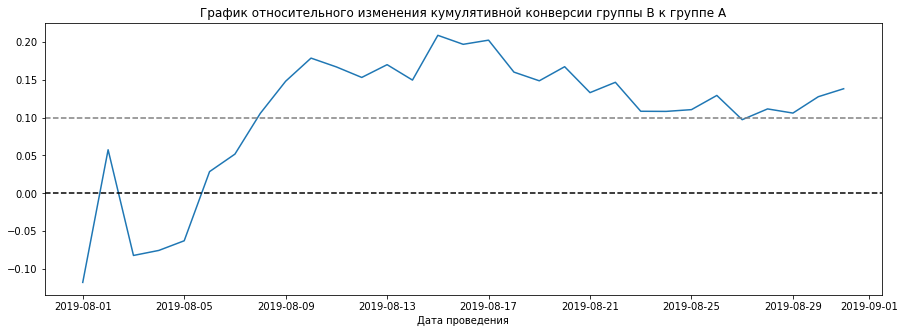

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
            .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата проведения');

В целом отношение конверсии ближе к концу теста стабилизировалось на уровне 0.1. **Иными словами, конверсия группы В лучше показателей группы А на 10%.** Однако делать выводы еще рано.  

###  Точечный график количества заказов по пользователям

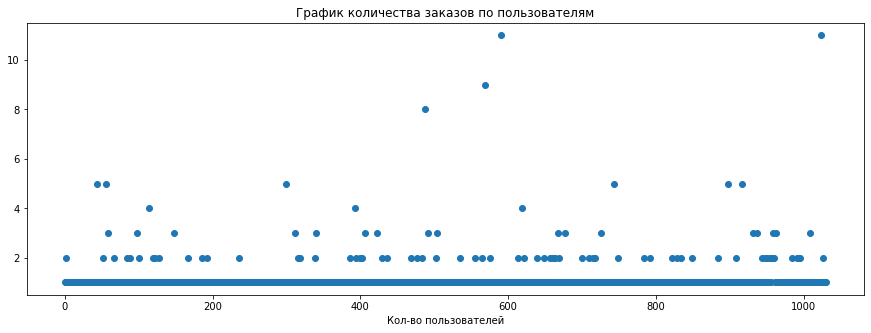

In [17]:
ordersByUsers = (orders.groupby('visitorid', as_index=False).agg({'transactionid': 'nunique'}))

ordersByUsers.columns = ['visitor_id', 'transaction']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15, 5))
plt.scatter(x_values, ordersByUsers['transaction'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Кол-во пользователей'); 

Как следует из графика, значительная доля пользователей оформили от 2 до 4 заказов. Но стоит ли считать это за выбросы? Проверим и посчитаем выборочные перцентили.

###  95-й и 99-й перцентили количества заказов на пользователя

In [18]:
np.percentile(ordersByUsers['transaction'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформили 2 заказа, и не более 1% - 4 заказа. Следовательно, возьмем за границу 2 заказа на пользователя, а все что выше - отсеим.

###  Точечный график стоимостей заказов

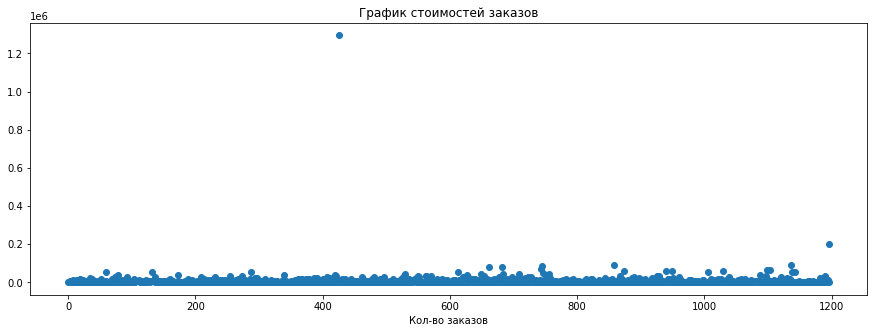

In [19]:
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Кол-во заказов'); 

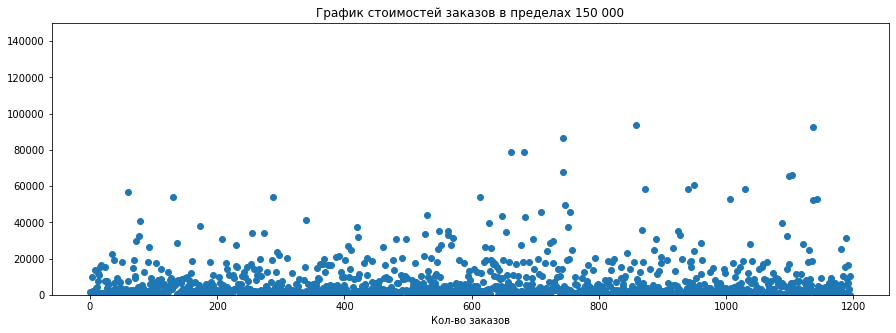

In [20]:
# увеличим масштаб графика для большей наглядности
plt.figure(figsize=(15, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim([0, 150000])
plt.title('График стоимостей заказов в пределах 150 000')
plt.xlabel('Кол-во заказов');

В зависимости от стоимости заказа, на графике также видны выбросы - единичные заказы на крупные суммы. Определим, какие из них следует отсечь.

###  95-й и 99-й перцентили стоимости заказов

In [21]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% пользователей совершили заказ на сумму свыше 28 000, и не более 1% - свыше 58 233-20. Следовательно, можно отбросить слишком дорогие заказы, чья стоимость превышает 28 000.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей. Сформулируем гипотезы:

Н0: различий в конверсии между группами нет

Н1: различия в конверсии между группами есть

In [22]:
# разграничим исходные данные по группе теста и посчитаем кумулятивные данные в разрезе групп
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# формируем новый датасет
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,20,101217,24,148579,20,101217,719,713,719,713
1,2019-08-02,20,93822,23,165531,44,242401,43,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,59,380996,507,509,1845,1803
3,2019-08-04,16,70825,16,108571,84,425699,75,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,98,581995,756,707,3318,3280


In [23]:
# найдем число совершённых заказов для каждой группы
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders'] # переименуем для удобства столбцы

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders'] 

In [24]:
# подготавливаем выборки к проверке критерием Манна-Уитни: 
# прописываем каждому пользователю из группы кол-во совершенных заказов
sampleA = pd.concat([ordersByUsersA['orders'],
         pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
        ],
        axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')
        ],
        axis=0)

alpha = .05 # Установим критический уровень статистической значимости в размере 5%

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

if ((stats.mannwhitneyu(sampleA, sampleB)[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.017
0.138
Отвергаем нулевую гипотезу


По «сырым» данным можно предположить, что различия в конверсии между группами A и B есть (p-value = 0.017 меньше чем 0.05), причем группа В выигрывает на 13%. 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 

Н0: различий в среднем чеке между группами нет. 

Н1: различия в среднем чеке между группами есть.

In [25]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
if ((stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.729
0.259
Не получилось отвергнуть нулевую гипотезу


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. **Однако, мы видим, что  средний чек группы B значительно выше среднего чека группы A (на 26%). Причина кроется в выбросах: мы посчитали метрики по "сырым" данным, т.е. на результаты теста оказали влияние аномально большие заказы.**

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Чтобы посчитать значимость различий в конверсии между группами по «очищенным» данным, необходимо избавиться от выбросов. Ранее мы определили границы по кол-ву заказов и по их сумме. Применим ограничения.

In [26]:
# найдем тех, кто попадает в категорию выбросов по кол-ву заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
# найдем тех, кто попадает в категорию выбросов по сумме чека
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
# группируем выбивающихся пользователей вместе
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))# исключаем выбросы
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))# исключаем выбросы
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
if ((stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.013
0.173
Отвергаем нулевую гипотезу


Результаты по конверсии практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [28]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)
if ((stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.738
-0.020
Не получилось отвергнуть нулевую гипотезу


P-value увеличился, но и разница между сегментами сократилась.

### Принятие решения по результатам теста 

Какие выводы по тесту можем сделать?

Имеющиеся факты:

- Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A, наблюдается положительный тренд;
- График различия среднего чека говорит о том, что результаты группы B на данный момент показывают отрицательный тренд, но в целом нельзя сказать, что результаты группы В хуже.

Исходя из обнаруженных фактов, тест следует остановить и признать победу группы В.